**Цуприков Дмитрий, ИУ5-63Б**

У меня 21-ый номер по списку, то есть я выполняю 21-ый вариант с заданием номер 3 и с набором данных номер 5. Задача звучит следующим образом: для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

Создадим датафрейм uni в библиотеке Pandas на основе имеющегося csv-файла :

In [2]:
import pandas as pd
uni = pd.read_csv("Admission_Predict.csv")
uni

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


Выполним масштабирование данных для колонки LOR в датасете с помощью метода MinMaxScaler, который приводит значения к десятичному формату в диапазоне от 0 до 1:

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(uni[["LOR "]])
uni["LOR "] = scaled_data
uni

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,0.875,9.65,1,0.92
1,2,324,107,4,4.0,0.875,8.87,1,0.76
2,3,316,104,3,3.0,0.625,8.00,1,0.72
3,4,322,110,3,3.5,0.375,8.67,1,0.80
4,5,314,103,2,2.0,0.500,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,0.625,9.04,1,0.82
396,397,325,107,3,3.0,0.625,9.11,1,0.84
397,398,330,116,4,5.0,0.875,9.45,1,0.91
398,399,312,103,3,3.5,0.750,8.78,0,0.67


Так как в исходном датасете отсутствуют категориальные признаки, создадим такой признак на основе числового для набора данных в колонке University Rating:

In [4]:
uni["University Rating"] = uni["University Rating"].replace({1: "худший", 2: "плохой", 3: "средний", 4: "хороший", 5: "лучший"})
uni

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,хороший,4.5,0.875,9.65,1,0.92
1,2,324,107,хороший,4.0,0.875,8.87,1,0.76
2,3,316,104,средний,3.0,0.625,8.00,1,0.72
3,4,322,110,средний,3.5,0.375,8.67,1,0.80
4,5,314,103,плохой,2.0,0.500,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,средний,3.5,0.625,9.04,1,0.82
396,397,325,107,средний,3.0,0.625,9.11,1,0.84
397,398,330,116,хороший,5.0,0.875,9.45,1,0.91
398,399,312,103,средний,3.5,0.750,8.78,0,0.67


Применим метод кодирования label encoding для преобразования категориального признака University Rating в числовой. Он присваивает уникальное числовое значение каждой категории, в данном случае от 0 до 4 - так как изначально 5 уникальных значений. Уникальные значения признака сортируются в лексикографическом порядке.

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
uni["University Rating (Label Encoded)"] = label_encoder.fit_transform(uni["University Rating"])
uni

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,University Rating (Label Encoded)
0,1,337,118,хороший,4.5,0.875,9.65,1,0.92,3
1,2,324,107,хороший,4.0,0.875,8.87,1,0.76,3
2,3,316,104,средний,3.0,0.625,8.00,1,0.72,2
3,4,322,110,средний,3.5,0.375,8.67,1,0.80,2
4,5,314,103,плохой,2.0,0.500,8.21,0,0.65,1
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,средний,3.5,0.625,9.04,1,0.82,2
396,397,325,107,средний,3.0,0.625,9.11,1,0.84,2
397,398,330,116,хороший,5.0,0.875,9.45,1,0.91,3
398,399,312,103,средний,3.5,0.750,8.78,0,0.67,2


Применим метод кодирования one hot encoding для преобразования категориального признака University Rating в числовой. В этом случае каждое уникальное значение признака становится новым отдельным признаком. Также мы применяем быстрый вариант one hot кодирования с помощью функции get_dummies из библиотеки Pandas.

In [6]:
one_hot_encoded_uni = pd.get_dummies(uni["University Rating"], prefix="University Rating")
uni = pd.concat([uni, one_hot_encoded_uni], axis=1)
uni

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,University Rating (Label Encoded),University Rating_лучший,University Rating_плохой,University Rating_средний,University Rating_хороший,University Rating_худший
0,1,337,118,хороший,4.5,0.875,9.65,1,0.92,3,0,0,0,1,0
1,2,324,107,хороший,4.0,0.875,8.87,1,0.76,3,0,0,0,1,0
2,3,316,104,средний,3.0,0.625,8.00,1,0.72,2,0,0,1,0,0
3,4,322,110,средний,3.5,0.375,8.67,1,0.80,2,0,0,1,0,0
4,5,314,103,плохой,2.0,0.500,8.21,0,0.65,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,средний,3.5,0.625,9.04,1,0.82,2,0,0,1,0,0
396,397,325,107,средний,3.0,0.625,9.11,1,0.84,2,0,0,1,0,0
397,398,330,116,хороший,5.0,0.875,9.45,1,0.91,3,0,0,0,1,0
398,399,312,103,средний,3.5,0.750,8.78,0,0.67,2,0,0,1,0,0


В качестве задания для студентов ИУ5-63Б построим график Ящик с усами для колонки Chance of Admit. Такой график позволяет компактно изобразить одномерное распределение вероятностей. Границами ящика служат первый и третий квартили (25-й и 75-й процентили соответственно), линия в середине ящика — медиана (50-й процентиль). Концы усов — края статистически значимой выборки (без выбросов).

<Axes: xlabel='Chance of Admit '>

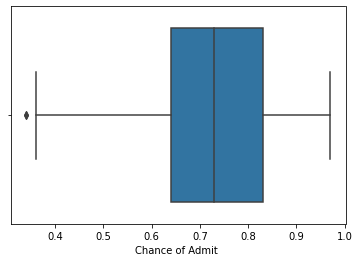

In [10]:
import seaborn as sns
sns.boxplot(x=uni['Chance of Admit '])

Касательно используемого метода масштабирования: преимущество использования MinMaxScaler заключается в том, что он сохраняет относительные пропорции между значениями, что может быть важно для некоторых моделей машинного обучения. Кроме того, масштабирование данных помогает уменьшить влияние выбросов и различных масштабов между признаками, что может улучшить работу модели.
Однако следует отметить, что MinMaxScaler не решает проблему выбросов, и если в данных присутствуют выбросы, то может потребоваться использование других методов масштабирования, например, RobustScaler или StandardScaler.

Плюсы метода кодирования label encoding:
- Простота и быстрота применения.
- Позволяет использовать алгоритмы машинного обучения, которые работают только с числовыми данными.

Минусы метода кодирования label encoding:
- Создает неявный порядок между значениями, что может вводить в заблуждение модель и приводить к неправильным выводам.
- Может приводить к некорректным результатам, если модель интерпретирует числовые значения как непрерывные или сравнивает их между собой.

Плюсы метода кодирования one hot encoding:
- Позволяет представить категориальные значения в виде бинарных признаков, что может быть полезно для моделей, которые не учитывают порядок или требуют явного представления категорий.
- Устраняет проблему неявного порядка, характерного для Label Encoding.
- Позволяет моделям учиться на более точных и интерпретируемых данных.

Минусы метода кодирования one hot encoding:
- Может привести к возникновению "проклятия размерности", особенно если есть много уникальных значений в категориальном признаке.
- Увеличивает размерность данных и может потребовать больше ресурсов для обработки и хранения.
- Может усложнить интерпретацию модели из-за большого количества дополнительных признаков.